In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import date

df=pd.read_csv('Longs data.csv')
print(df.columns)
df=df.drop('REGION', axis=1)


Index(['REGION', 'DATETIME', 'TOTALDEMAND', 'RRP', 'ALLSKY_SFC_SW_DWN', 'T2M',
       'T2MDEW', 'T2MWET', 'RH2M', 'PS', 'WS2M'],
      dtype='object')


In [45]:
# Ensure the column is in datetime format
df['DATETIME'] = pd.to_datetime(df['DATETIME'])

# Extract the hour (0 to 23)
df['HOUR'] = df['DATETIME'].dt.hour

# Convert hour into sin and cos for cyclical encoding
df['HOUR_SIN'] = np.sin(2 * np.pi * df['HOUR'] / 24)
df['HOUR_COS'] = np.cos(2 * np.pi * df['HOUR'] / 24)

In [46]:
# Extract weekday (0=Monday, 6=Sunday)
df['WEEKDAY'] = df['DATETIME'].dt.weekday

# One-hot encode the weekday
weekday_dummies = pd.get_dummies(df['WEEKDAY'], prefix='WEEKDAY')
df = pd.concat([df, weekday_dummies], axis=1)

# Cyclical encoding for weekday
df['WEEKDAY_SIN'] = np.sin(2 * np.pi * df['WEEKDAY'] / 7)
df['WEEKDAY_COS'] = np.cos(2 * np.pi * df['WEEKDAY'] / 7)
df.drop('WEEKDAY',axis=1)

,DATETIME,TOTALDEMAND,RRP,ALLSKY_SFC_SW_DWN,T2M,T2MDEW,T2MWET,RH2M,PS,WS2M,...,HOUR_COS,WEEKDAY_0,WEEKDAY_1,WEEKDAY_2,WEEKDAY_3,WEEKDAY_4,WEEKDAY_5,WEEKDAY_6,WEEKDAY_SIN,WEEKDAY_COS
0,2018-01-01 01:00:00,6745.63,88.83,0.00,21.32,18.93,20.12,86.15,100.23,3.04,...,0.965926,True,False,False,False,False,False,False,0.000000,1.000000
1,2018-01-01 02:00:00,6279.80,71.49,0.00,21.09,19.03,20.06,87.90,100.17,2.52,...,0.866025,True,False,False,False,False,False,False,0.000000,1.000000
2,2018-01-01 03:00:00,6050.43,68.44,0.00,20.90,19.13,20.02,89.43,100.16,2.09,...,0.707107,True,False,False,False,False,False,False,0.000000,1.000000
3,2018-01-01 04:00:00,5968.50,67.58,0.00,20.77,19.18,19.98,90.41,100.17,1.83,...,0.500000,True,False,False,False,False,False,False,0.000000,1.000000
4,2018-01-01 05:00:00,5962.18,67.53,69.03,21.15,19.20,20.18,88.48,100.20,1.54,...,0.258819,True,False,False,False,False,False,False,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48091,2023-06-27 20:00:00,10512.84,150.02,0.00,14.91,6.10,10.50,55.72,101.53,2.71,...,0.500000,False,True,False,False,False,False,False,0.781831,0.623490
48092,2023-06-27 21:00:00,9947.53,96.83,0.00,13.96,6.75,10.36,61.89,101.52,3.11,...,0.707107,False,True,False,False,False,False,False,0.781831,0.623490
48093,2023-06-27 22:00:00,9167.84,88.88,0.00,13.19,7.14,10.17,66.77,101.51,3.16,...,0.866025,False,True,False,False,False,False,False,0.781831,0.623490
48094,2023-06-27 23:00:00,8663.23,67.42,0.00,12.96,7.21,10.09,68.08,101.47,2.96,...,0.965926,False,True,False,False,False,False,False,0.781831,0.623490


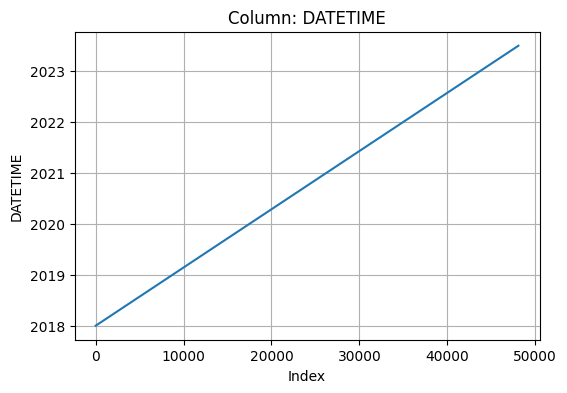

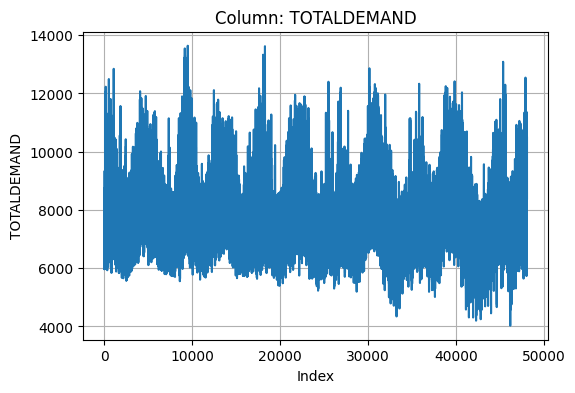

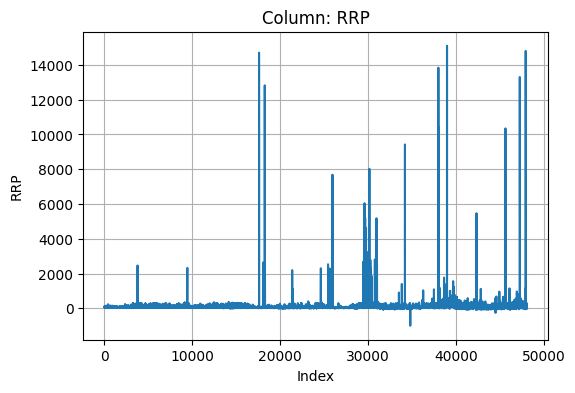

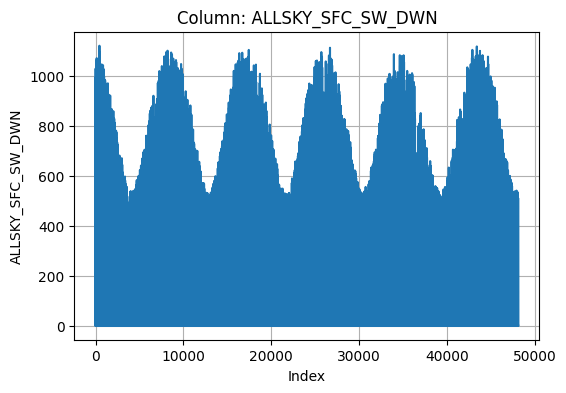

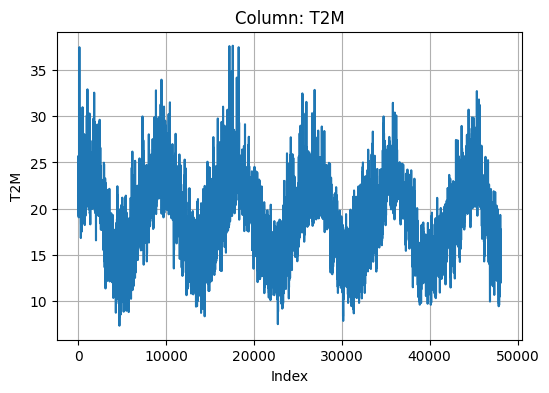

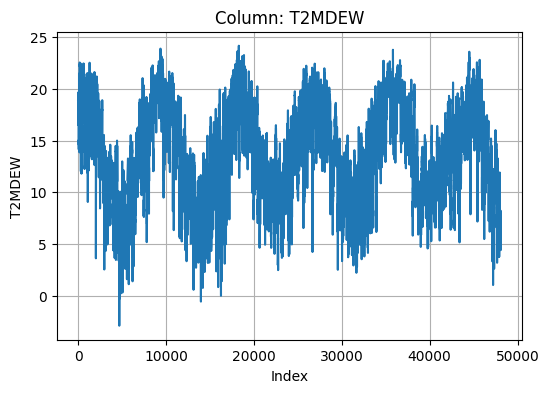

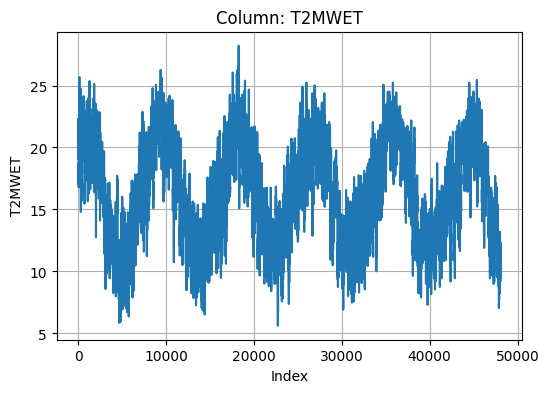

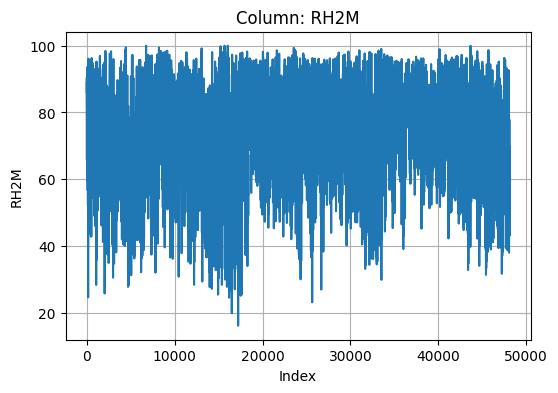

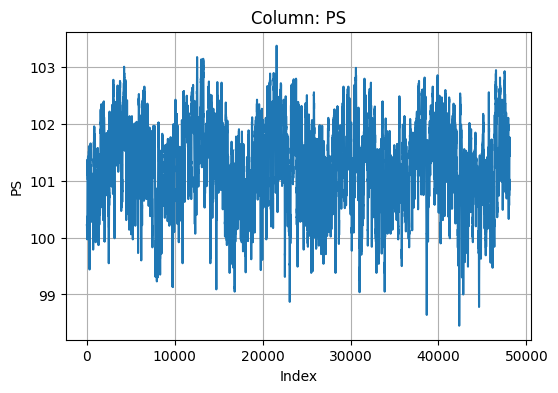

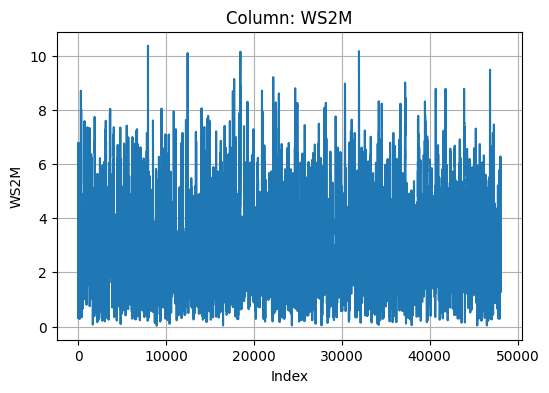

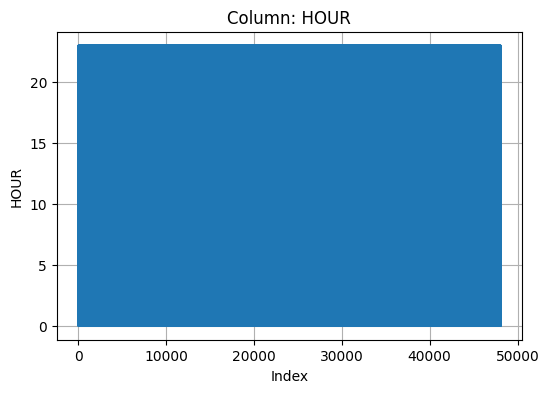

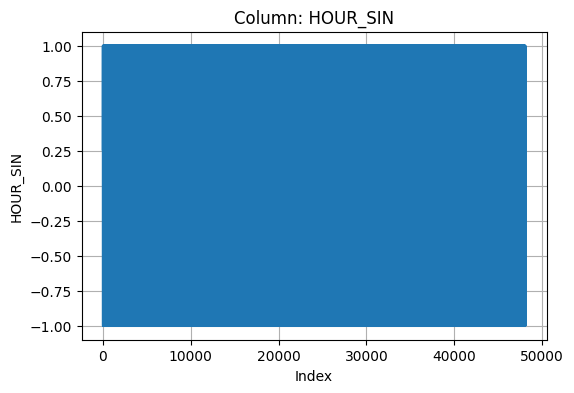

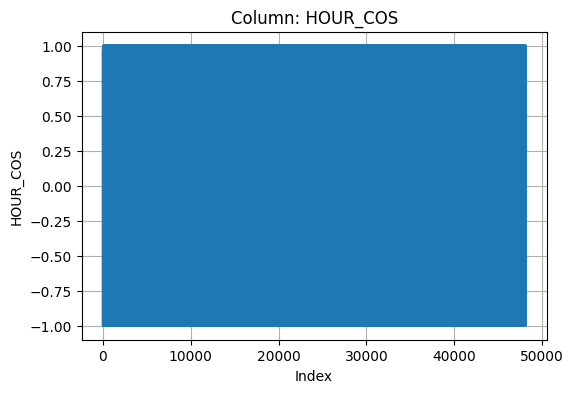

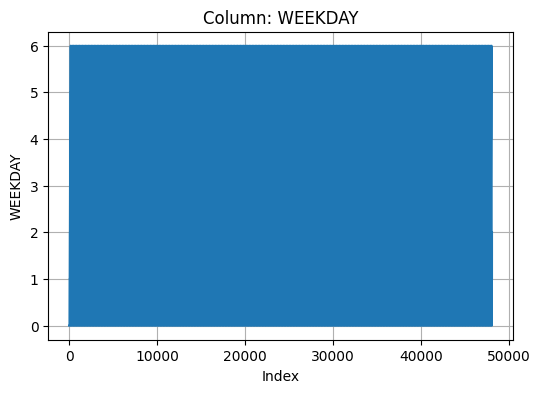

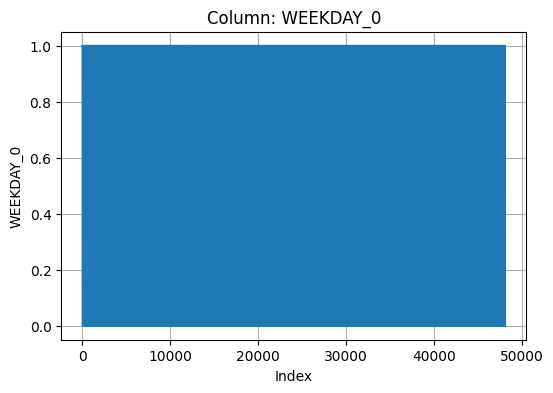

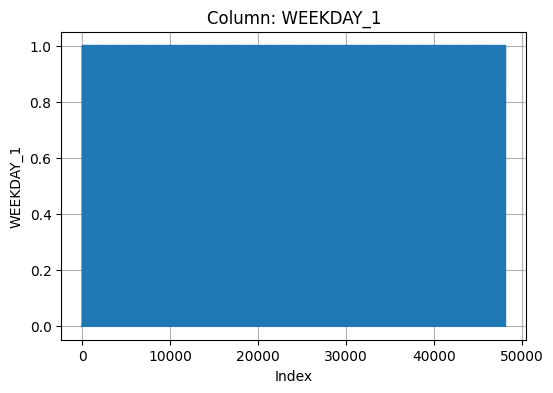

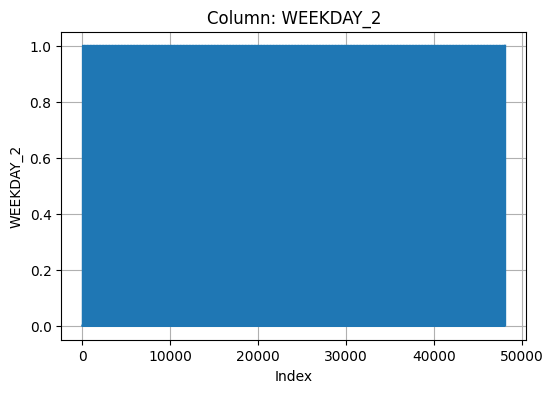

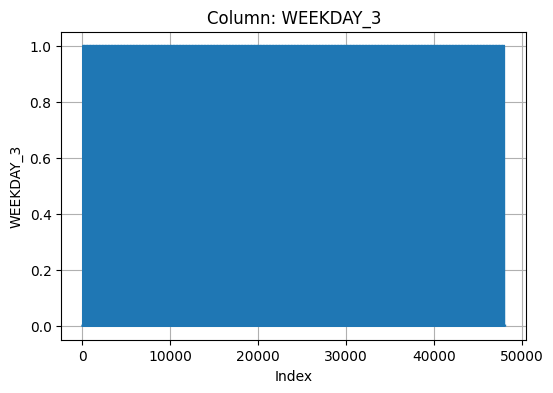

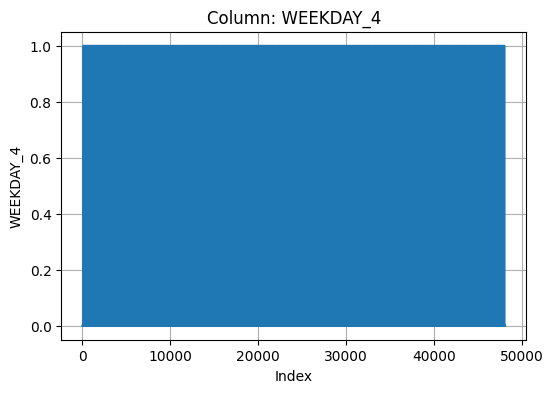

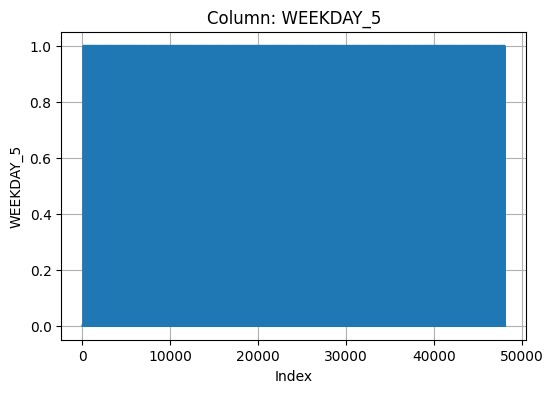

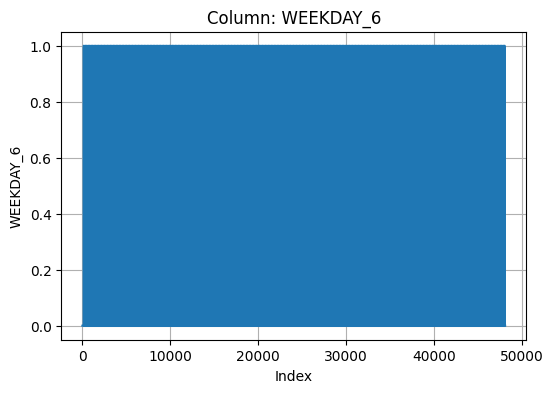

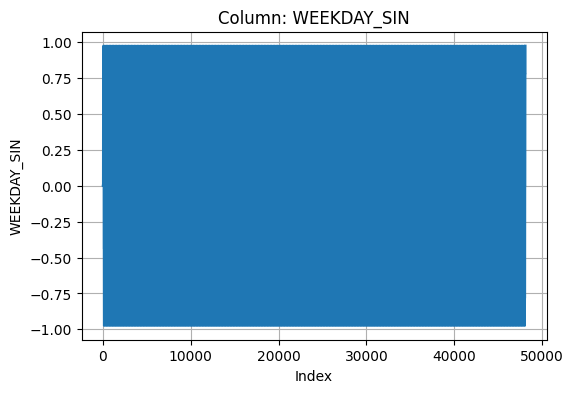

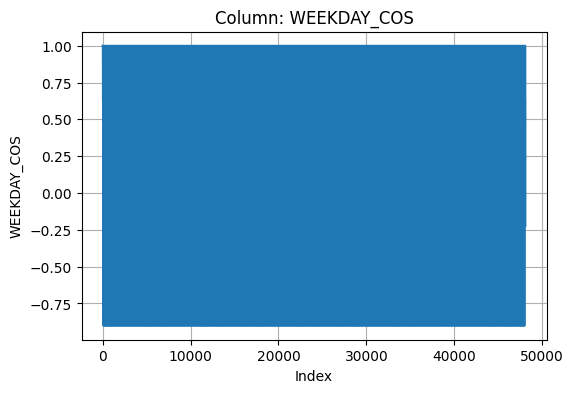

In [47]:
for column in df.columns:
    plt.figure(figsize=(6, 4))
    plt.plot(df[column])
    plt.title(f'Column: {column}')
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.grid(True)
    plt.show()

In [48]:
lower = df['RRP'].quantile(0.025)
upper = df['RRP'].quantile(0.975)

print(f"Middle 95% range: {lower} to {upper}")
df['RRP'] = df['RRP'].clip(lower, upper)

Middle 95% range: 14.463750000000001 to 314.82874999999996


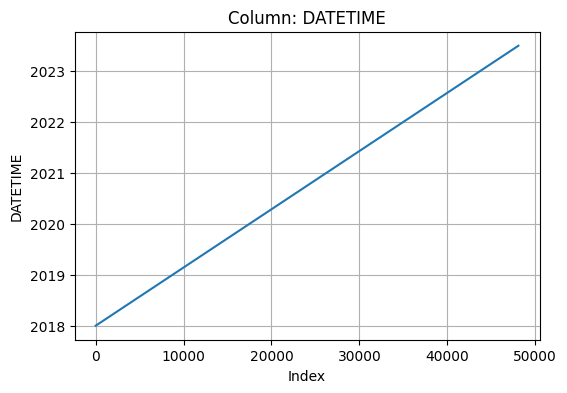

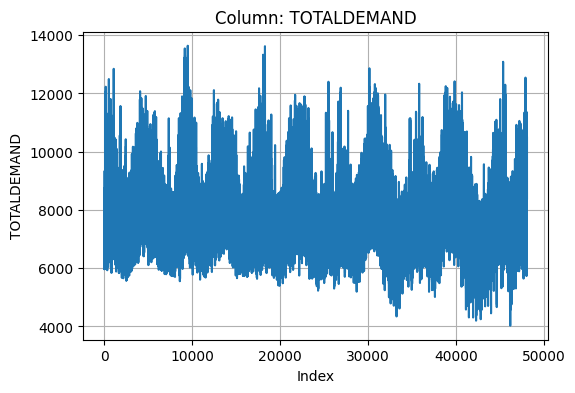

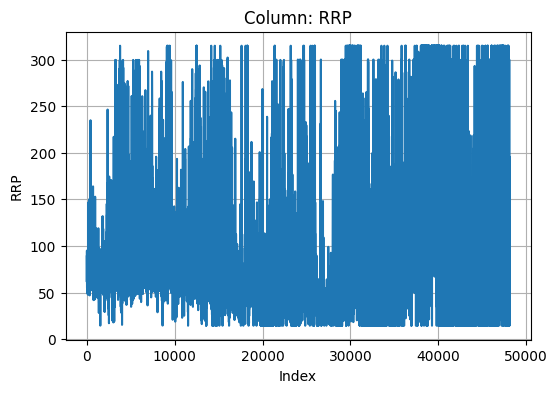

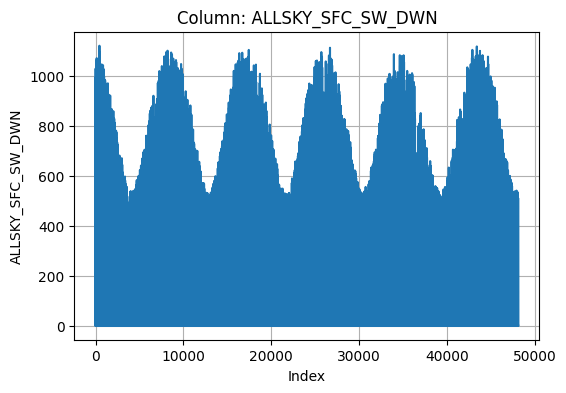

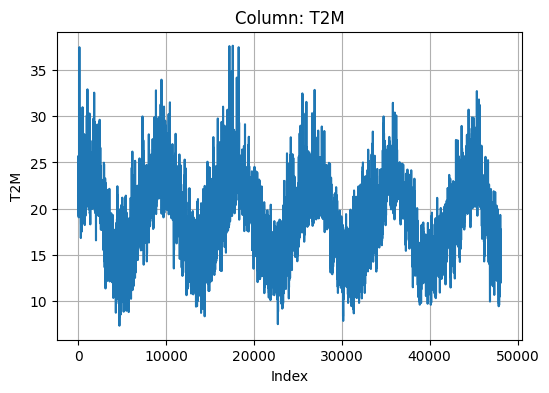

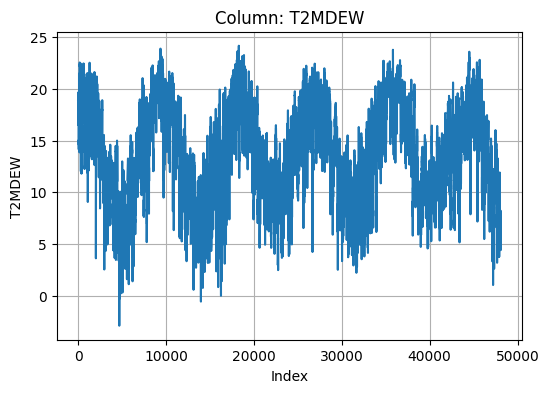

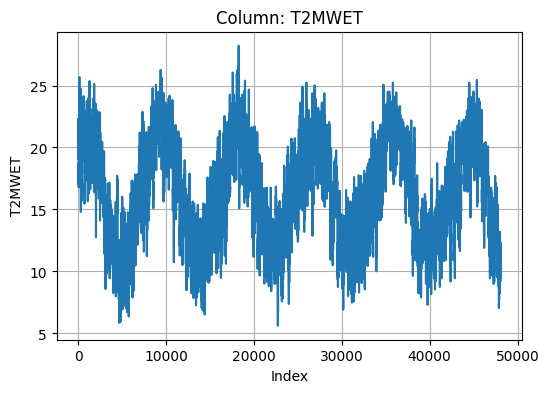

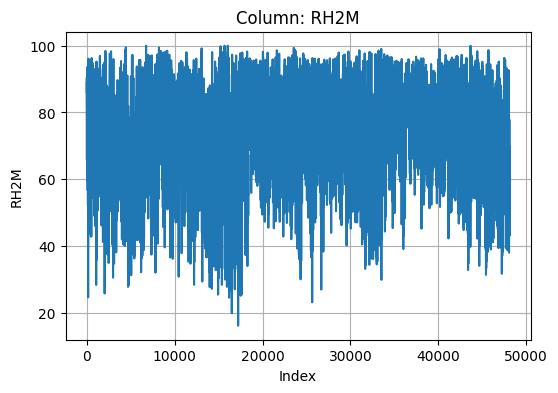

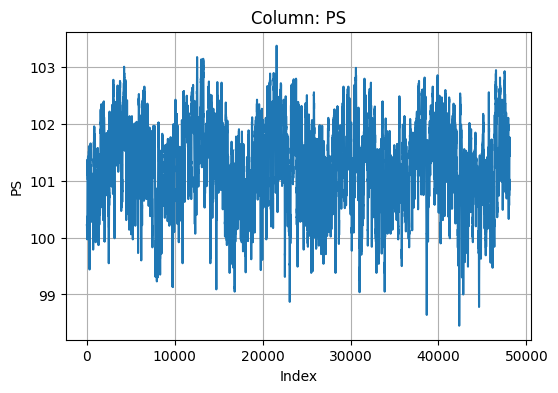

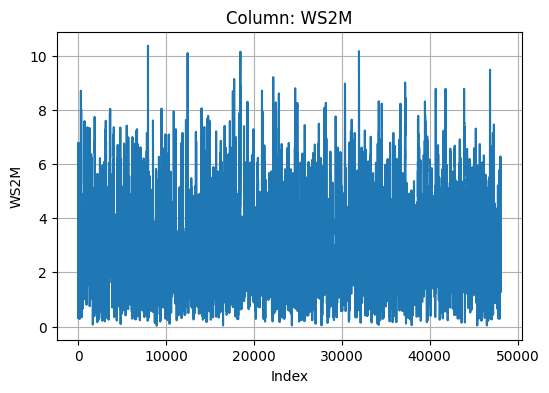

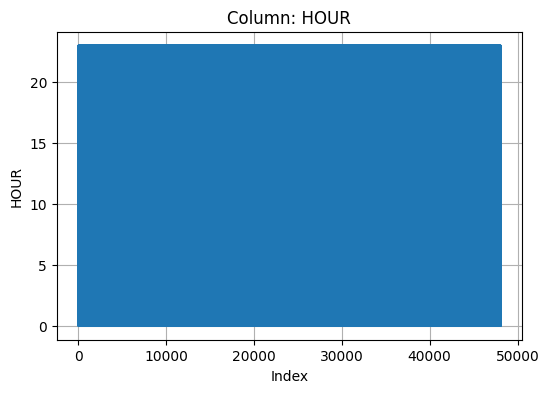

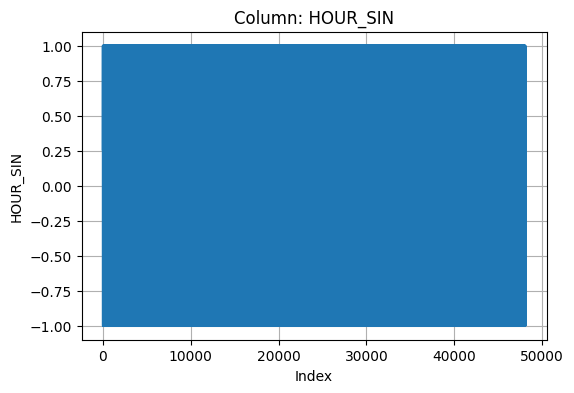

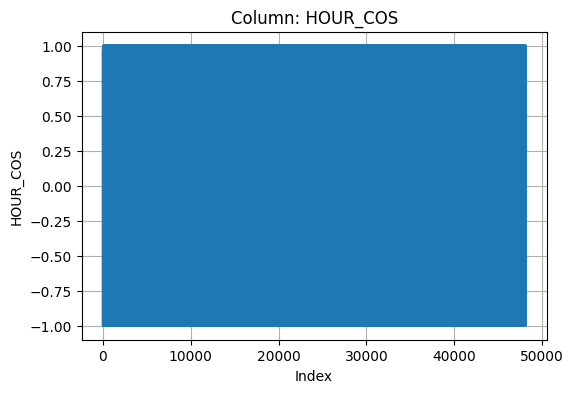

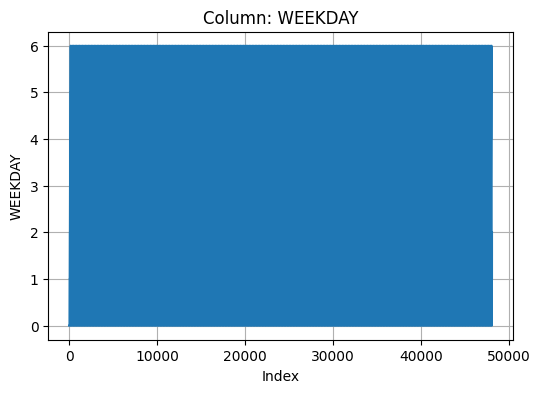

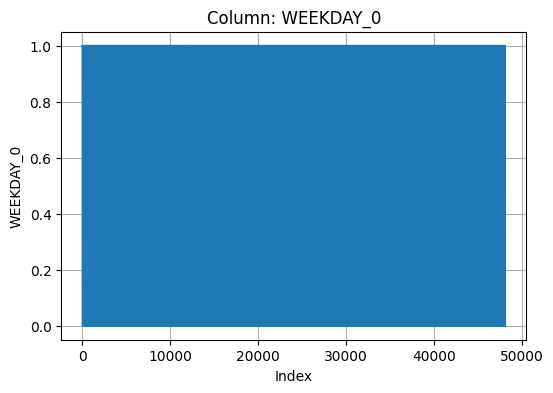

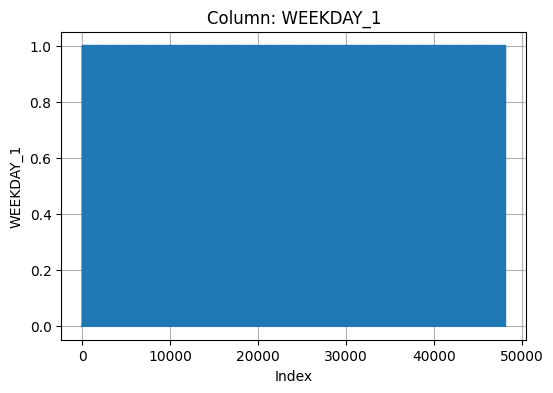

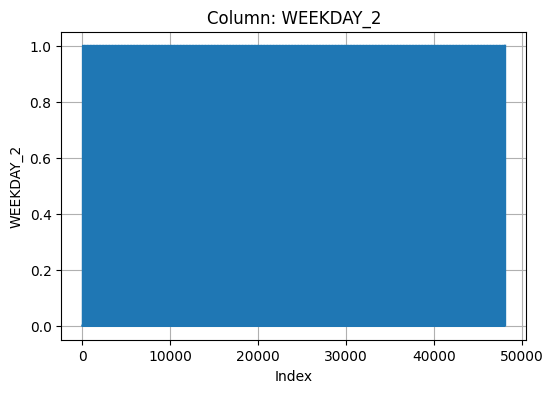

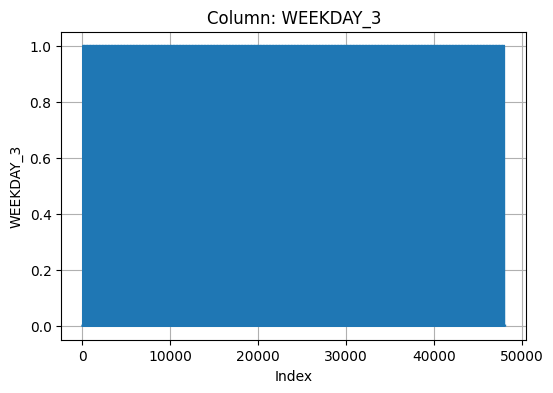

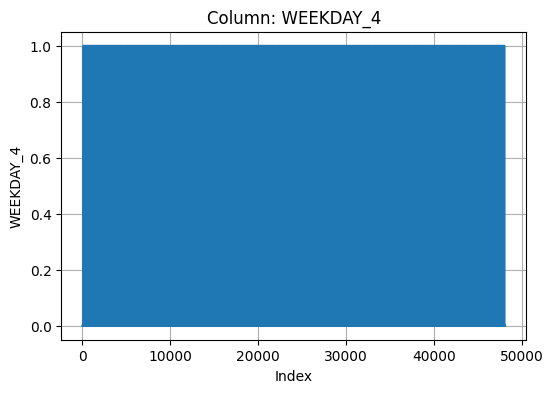

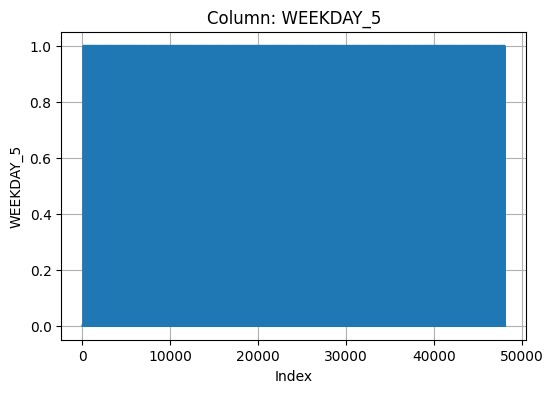

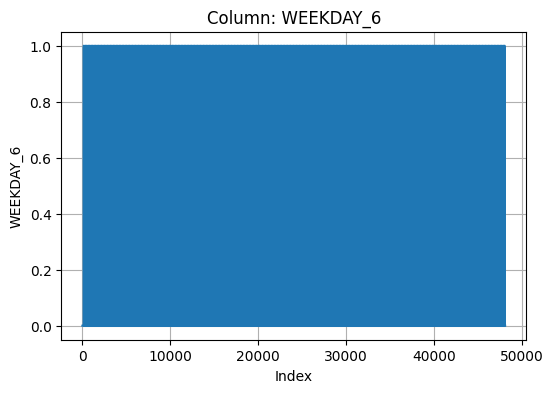

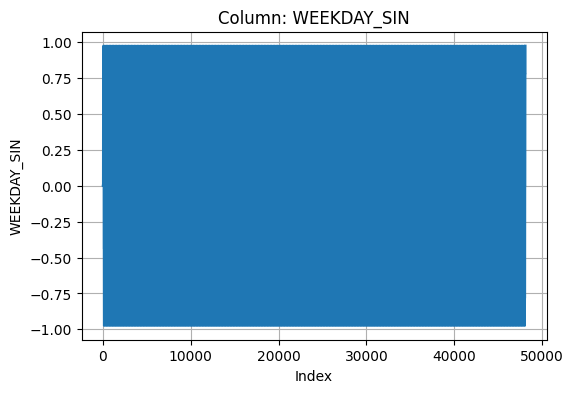

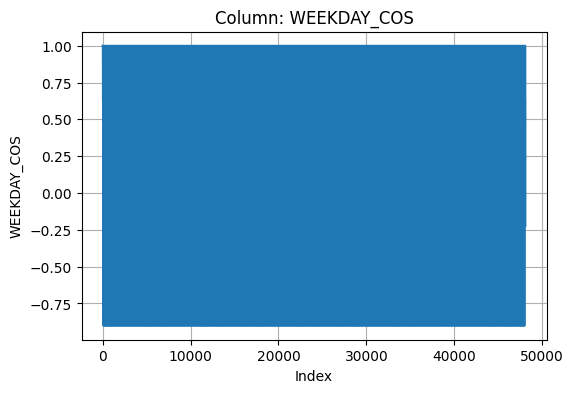

In [49]:
for column in df.columns:
    plt.figure(figsize=(6, 4))
    plt.plot(df[column])
    plt.title(f'Column: {column}')
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.grid(True)
    plt.show()

In [52]:
print(df.columns)
df.head()

Index(['DATETIME', 'TOTALDEMAND', 'RRP', 'ALLSKY_SFC_SW_DWN', 'T2M', 'T2MDEW',
       'T2MWET', 'RH2M', 'PS', 'WS2M', 'HOUR', 'HOUR_SIN', 'HOUR_COS',
       'WEEKDAY', 'WEEKDAY_0', 'WEEKDAY_1', 'WEEKDAY_2', 'WEEKDAY_3',
       'WEEKDAY_4', 'WEEKDAY_5', 'WEEKDAY_6', 'WEEKDAY_SIN', 'WEEKDAY_COS'],
      dtype='object')


,DATETIME,TOTALDEMAND,RRP,ALLSKY_SFC_SW_DWN,T2M,T2MDEW,T2MWET,RH2M,PS,WS2M,...,WEEKDAY,WEEKDAY_0,WEEKDAY_1,WEEKDAY_2,WEEKDAY_3,WEEKDAY_4,WEEKDAY_5,WEEKDAY_6,WEEKDAY_SIN,WEEKDAY_COS
0,2018-01-01 01:00:00,6745.63,88.83,0.00,21.32,18.93,20.12,86.15,100.23,3.04,...,0,True,False,False,False,False,False,False,0.0,1.0
1,2018-01-01 02:00:00,6279.80,71.49,0.00,21.09,19.03,20.06,87.90,100.17,2.52,...,0,True,False,False,False,False,False,False,0.0,1.0
2,2018-01-01 03:00:00,6050.43,68.44,0.00,20.90,19.13,20.02,89.43,100.16,2.09,...,0,True,False,False,False,False,False,False,0.0,1.0
3,2018-01-01 04:00:00,5968.50,67.58,0.00,20.77,19.18,19.98,90.41,100.17,1.83,...,0,True,False,False,False,False,False,False,0.0,1.0
4,2018-01-01 05:00:00,5962.18,67.53,69.03,21.15,19.20,20.18,88.48,100.20,1.54,...,0,True,False,False,False,False,False,False,0.0,1.0
